In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Project Background

This project focuses on optimizing a year-end sale campaign for a superstore by offering a gold membership exclusively for existing customers, priced at  499 dollar  (down from 999 dollar), which provides a 20% discount on all purchases. The goal is to identify which customer segments are most likely to purchase this offer. By predicting the most responsive customers, the store aims to reduce campaign costs and maximize sales through a targeted marketing approach.

This project aims to identify which customers are most likely to avail the new gold membership offer, helping the superstore reduce marketing costs while boosting sales. Using customer demographics, purchase behaviors, and past campaign responses, a dashboard using Power BI was developed to predict customer responses and analyze key factors driving their behavior.

Key observations indicate that Elite Customers—primarily adults who recently made purchases—account for 86% of total sales. Married and graduated individuals show a strong likelihood to buy the membership, especially those who prefer non-vegetarian items like meat and fish. While in-store purchases dominate, efforts to encourage online sales should be explored. Married couples are particularly interested in Gold Products, providing a strong revenue source.



# About the dataset structure

In [2]:
df = pd.read_csv('superstore_data.csv')

# Understanding the data

In [3]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
df.shape

(2240, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We can see that we dont have a lot of missing values in the dataset.

In [8]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

Since we have null values in 24 rows in Income columns, we will fill them by mean value

In [11]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [12]:
df.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [13]:
df.duplicated().sum()

0

We dont have any duplicates in the dataset

In [15]:
data_categorical = df.select_dtypes(include=['object'])
data_categorical.describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,8/31/2012
freq,1127,864,12


In [16]:
# Convert date column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [17]:
# Feature Engineering: Create Age Column
df['Age'] = 2024 - df['Year_Birth']

In [18]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,189,218,1,4,4,6,1,1,0,54
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,37,1,7,3,7,5,1,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,30,1,3,2,5,2,0,0,66
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,0,1,1,0,2,7,0,0,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,0,34,2,3,1,2,7,1,0,35


# Understanding the Customer Purchase Behaviour & Engagements

In [19]:
# Total Customers
total_customers = df.shape[0]
print(f"Total Customers: {total_customers}")

Total Customers: 2240


In [20]:
# Average Days Since Last Purchase
avg_days_since_last_purchase = df['Recency'].mean()
print(f"Average Days Since Last Purchase: {avg_days_since_last_purchase:.2f}")

Average Days Since Last Purchase: 49.11


In [21]:
# Number of Purchases with Discount
total_discount_purchases = df['NumDealsPurchases'].sum()
print(f"Total Purchases with Discount: {total_discount_purchases}")

Total Purchases with Discount: 5208


In [22]:
# Total Complaints
total_complaints = df['Complain'].sum()
print(f"Total Complaints: {total_complaints}")

Total Complaints: 21


In [23]:
# Interpretation and Business Insights
print("\nInterpretation:")
print(f"- The dataset contains {total_customers} unique customers, providing a strong base for analysis.")
print(f"- On average, customers made their last purchase {avg_days_since_last_purchase:.2f} days ago, indicating a mix of frequent and occasional buyers.")
print(f"- A total of {total_discount_purchases} purchases were made using discounts, suggesting that customers are price-sensitive and respond well to promotional offers.")
print(f"- The dataset records {total_complaints} complaints, which is a low rate (~{(total_complaints/total_customers)*100:.2f}%), indicating overall customer satisfaction but also an opportunity to investigate common concerns.")


Interpretation:
- The dataset contains 2240 unique customers, providing a strong base for analysis.
- On average, customers made their last purchase 49.11 days ago, indicating a mix of frequent and occasional buyers.
- A total of 5208 purchases were made using discounts, suggesting that customers are price-sensitive and respond well to promotional offers.
- The dataset records 21 complaints, which is a low rate (~0.94%), indicating overall customer satisfaction but also an opportunity to investigate common concerns.


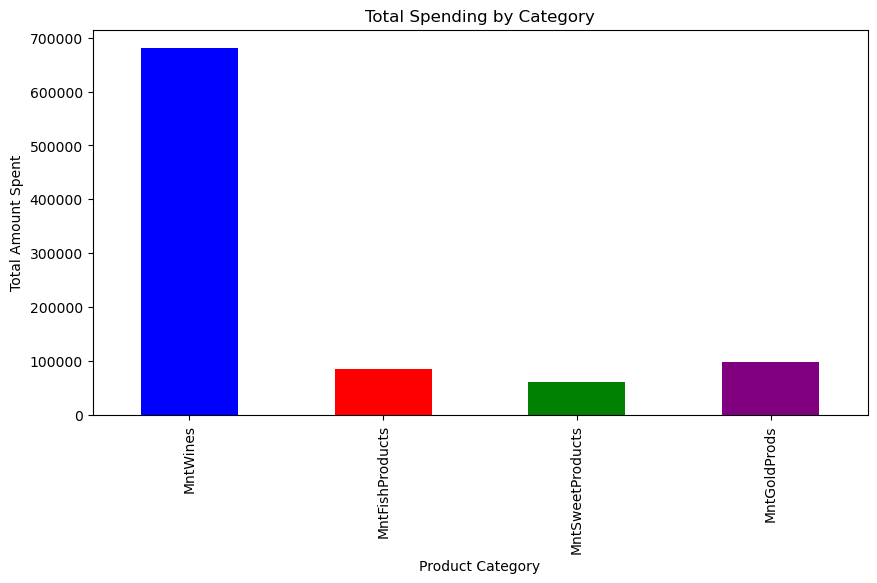

In [27]:
# Exploring Spending Behavior
plt.figure(figsize=(10,5))
spending_cols = ['MntWines', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[spending_cols].sum().plot(kind='bar', color=['blue', 'red', 'green', 'purple'])
plt.title("Total Spending by Category")
plt.xlabel("Product Category")
plt.ylabel("Total Amount Spent")
plt.show()



<Figure size 1200x600 with 0 Axes>

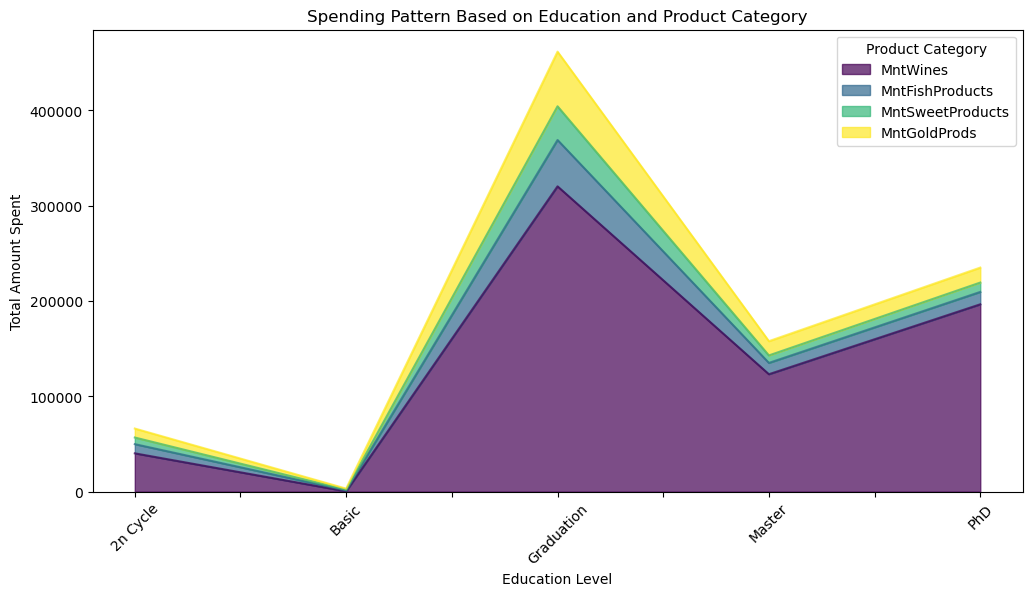

In [29]:
# Visualizing Spending Pattern Based on Education Level
plt.figure(figsize=(12,6))
education_spending = df.groupby('Education')[['MntWines', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
education_spending.plot(kind='area', figsize=(12,6), colormap='viridis', alpha=0.7)
plt.title("Spending Pattern Based on Education and Product Category")
plt.xlabel("Education Level")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.show()

Population with Higher education tend to spend more, mainly in wine & Fish Products

In [31]:
# Extract Year from Dt_Customer if not already done
df['Year'] = df['Dt_Customer'].dt.year

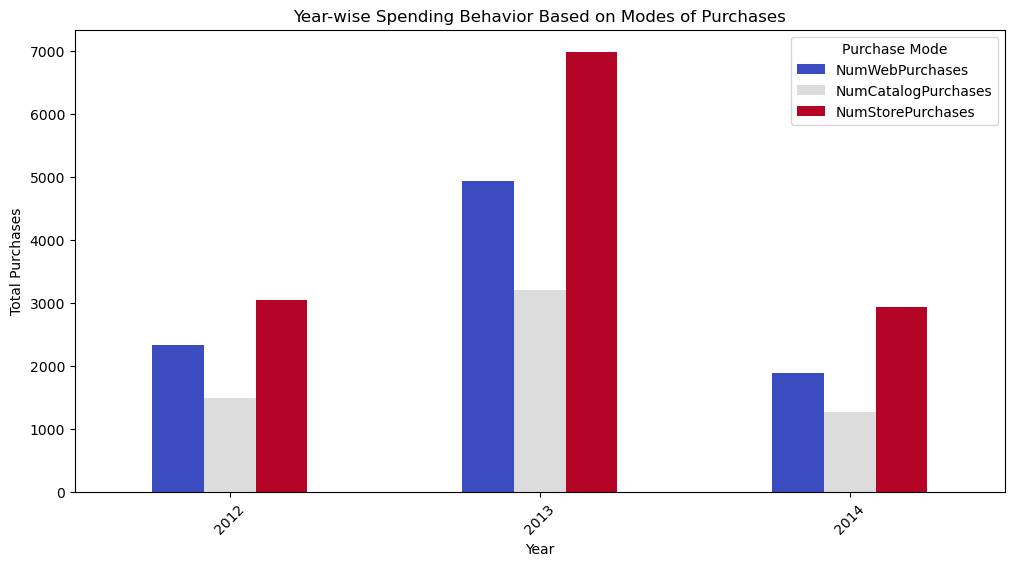

In [32]:
# Visualizing Year-wise Spending Behavior Based on Modes of Purchases
yearly_spending = df.groupby('Year')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
yearly_spending.plot(kind='bar', figsize=(12,6), colormap='coolwarm')
plt.title("Year-wise Spending Behavior Based on Modes of Purchases")
plt.xlabel("Year")
plt.ylabel("Total Purchases")
plt.xticks(rotation=45)
plt.legend(title="Purchase Mode")
plt.show()

Majority of purchases is done by in store

In [33]:
# Check how many customers have purchased gold based on marital status
df['PurchasedGold'] = df['MntGoldProds'] > 0  # Create a new column indicating if the customer purchased gold


In [34]:
# Group by Marital Status and sum the number of customers who purchased gold
marital_status_gold_purchase = df.groupby('Marital_Status')['PurchasedGold'].sum()

In [35]:
# Display the result
print(marital_status_gold_purchase)

Marital_Status
Absurd        2
Alone         3
Divorced    227
Married     841
Single      469
Together    559
Widow        76
YOLO          2
Name: PurchasedGold, dtype: int64


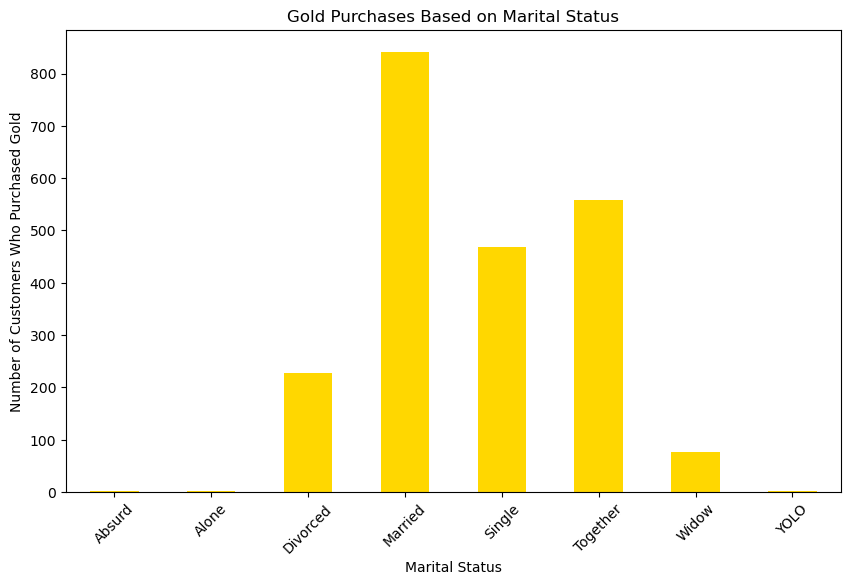

In [36]:
# Optionally, visualize the result
marital_status_gold_purchase.plot(kind='bar', figsize=(10,6), color='gold')
plt.title("Gold Purchases Based on Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers Who Purchased Gold")
plt.xticks(rotation=45)
plt.show()

Married couple purchase the gold the most

In [42]:
# Categorizing customers by age
def categorize_age(age):
    if age <= 19:
        return "Teen"
    elif age <= 60 and age >= 20:
        return "Adult"
    else:
        return "Old"

In [43]:
df["Age_Category"] = df["Age"].apply(categorize_age)

In [56]:
# Group by Age Category and sum visit frequency
age_visit_data = df.groupby("Age_Category")["Recency"].sum()

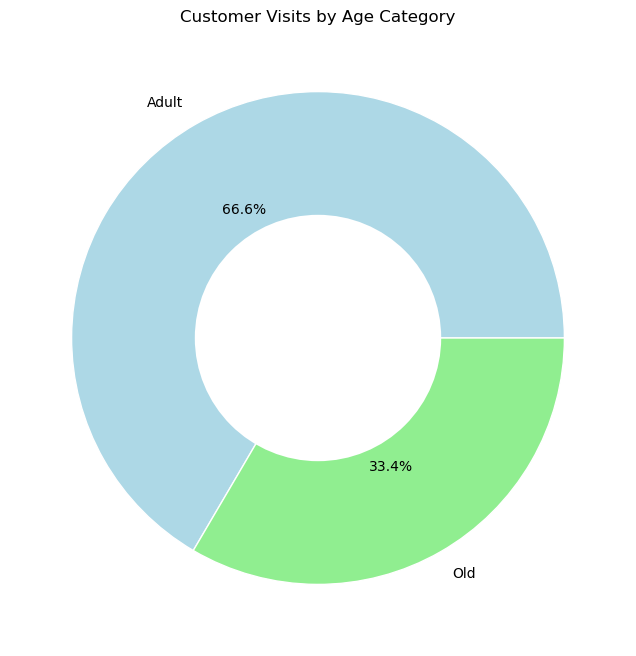

In [57]:
# Plot donut chart
plt.figure(figsize=(8,8))
colors = ["lightblue", "lightgreen", "gold"]  # Colors for categories
plt.pie(age_visit_data, labels=age_visit_data.index, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'white'})
plt.gca().add_artist(plt.Circle((0,0),0.5,fc='white'))  # Create white center for donut effect

plt.title("Customer Visits by Age Category")
plt.show()

Adults visit the shop's most often than old population

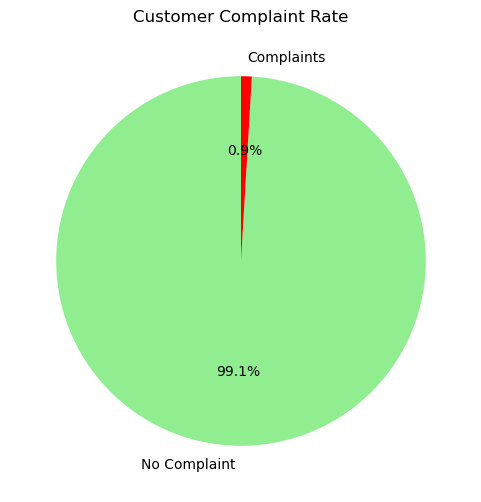

In [49]:
# Complaint Distribution
complaint_counts = df["Complain"].value_counts()
labels = ["No Complaint", "Complaints"]
colors = ["lightgreen", "red"]

plt.figure(figsize=(6,6))
plt.pie(complaint_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Customer Complaint Rate")
plt.show()

There are really low complaints from customers suggesting customer satisfaction

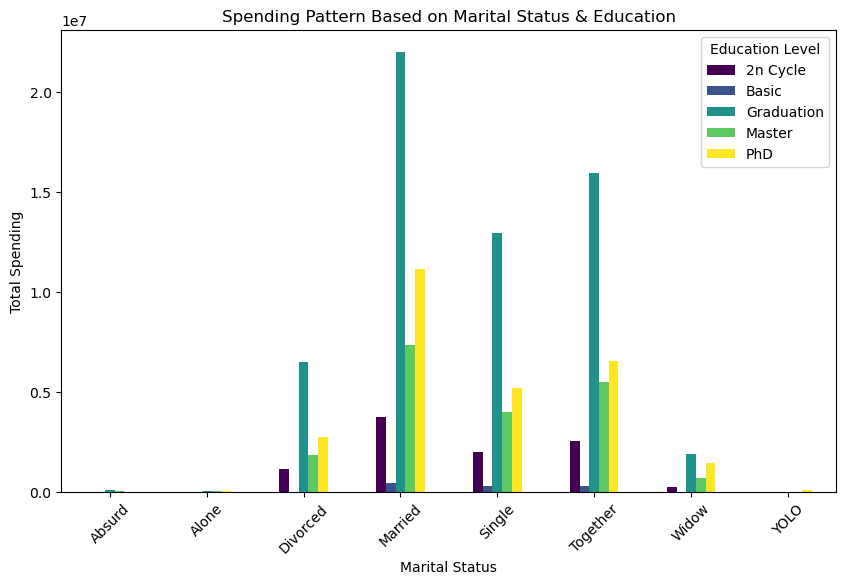

In [52]:
# Aggregate spending by Marital Status and Education
marital_edu_spending = df.groupby(["Marital_Status", "Education"])["Income"].sum().unstack()

# Plot spending pattern
marital_edu_spending.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Spending Pattern Based on Marital Status & Education")
plt.xlabel("Marital Status")
plt.ylabel("Total Spending")
plt.legend(title="Education Level")
plt.xticks(rotation=45)
plt.show()


Married & higher education population tend to have high potential for spending

# From above Exploratory  Data Analysis we get the below insights:

# Conclusion


By implementing these recommendations, the superstore can effectively reduce campaign costs while targeting the right customers with the gold membership offer. The predictive model will play a crucial role in identifying potential buyers, allowing for a more efficient and targeted campaign approach.

Note: The observations and recommendations presented here are based on the available data and provide valuable insights for management decision-making. Further analysis and exploration of these findings can uncover additional opportunities for growth and optimization within the company.